# Question 3

## In this question we will:
- Compute and display an image's histogram.
- Practice displaying multiple plots in a single figure (see Assignment PDF section 2.7)
- Learn to maniuplate the overall plot size and aspect ratio
- Practice some grayscale transformations we learned in Lecture 2.
- Plot images with their Histograms in a single figure


In [3]:
# Boilerplate imports
%matplotlib inline  

import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import skimage.exposure as exposure
import skimage.util as skutil
import skimage.color as skcolor


# Step 1: Displaying an image's histogram

To display an image's histogram, you first need to obtain the histogram.  Note that this is a different operation than histogram equalization.  Given an image, we just want to obtain it's histogram without modifying the image.  This can be done with the np.histogram() function which returns two arrays:  a one-dimensional numpy array containing the bin counts for each bin of the histogram, and an array called `bin_edges` which we can ignore.  But remember that the return value is a tuple of two items and we only need the first one of the pair containing the bin counts.


<BarContainer object of 256 artists>

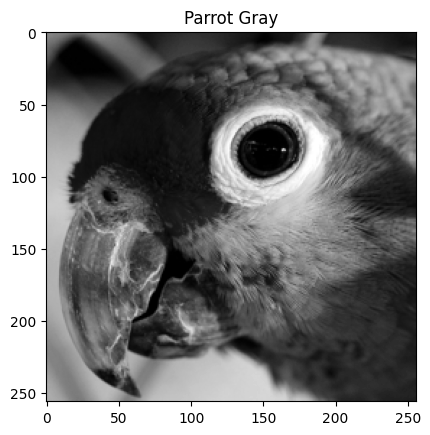

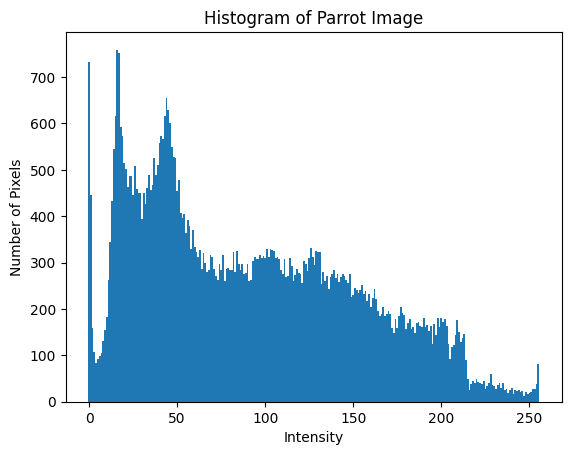

In [90]:
# TODO Load the parrot image.  Make sure it is stored as an 8-bit grayscale image using skutil.image_as_ubyte()

parrot = io.imread("parrot.png")
parrotU = skutil.img_as_ubyte(parrot)

# TODO Convert the colour parrot image to grayscale 
#      (don't overwrite the colour image -- we'll need it later).

parrotG = skcolor.rgb2gray(skutil.img_as_float(parrotU))

# TODO Display the grayscale parrot image.

figure = plt.figure()
plt.imshow(parrotG, cmap='gray',vmin=0, vmax=1)
plt.title("Parrot Gray")


# TODO Display the histogram of the grayscale parrot image in a *separate figure*.  Use np.histogram() to obtain the histogram and
#     use plt.bar() to display it.   Note that np.histogram() returns a tuple of *two* arrays.  We only need
#     the first array of the tuple, which is array of counts for each histogram bin.  If the histogram doesn't
#     look like you expect, or you get errors, make sure the length of the parameter x to the plt.bar() function 
#     matches the length of the array of histogram bin counts.  Also you may need to take a look at the optional
#     bins parameter to np.histogram().  Read the documentation for both functions as needed.  We want a bin
#     for each intensity level in the original image.

figure2 = plt.figure()
plt.title("Histogram of Parrot Image")
plt.ylabel("Number of Pixels")
plt.xlabel("Intensity")
x = [i for i in range(0,256)]
counts = np.histogram(parrotG, bins=256)[0]
plt.bar(x, counts, width = 1)


# Step 2: Display the image and the histogram together in single figure

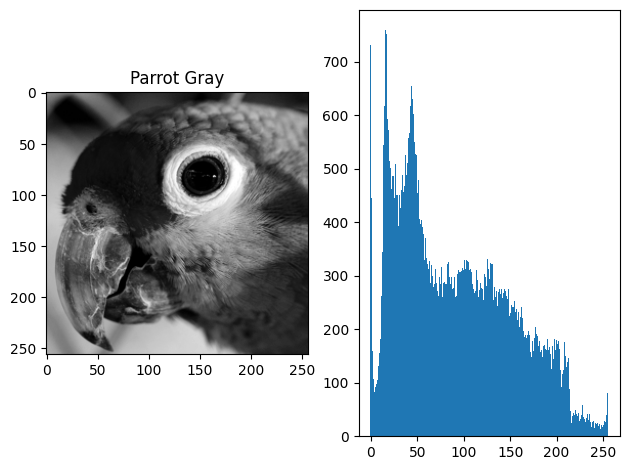

In [91]:
# TODO Modify your solution in step 1 to use plt.subplots() and plt.subplot() 
#      so that both plots are shown in the same figure, side-by-side. 
#      (see section 2.7 of the assignment PDF).  Don't worry if the
#      histogram looks squished.  We'll fix that in Step 3.


# Here (after the figure is created) we call plt.tight_layout() which is very helpful for subplots.  
# It adds whitespace around subplots so things look more attractive.
plt.subplots(1,2)

plt.subplot(1,2,1)
plt.imshow(parrotG,cmap='gray',vmin=0, vmax=1)
plt.title("Parrot Gray")

plt.subplot(1,2,2)
plt.bar(x, counts, width = 1)
plt.tight_layout()


# Step 3: Modify the figure size and aspect ratio

In step 2 you might have noticed that the histogram looks squished.  This is because the default aspect ratio of a figure is not suitable to the aspect ratio of the figure we want to create.  Here we will fix that by changing the aspect ratio of the figure.  

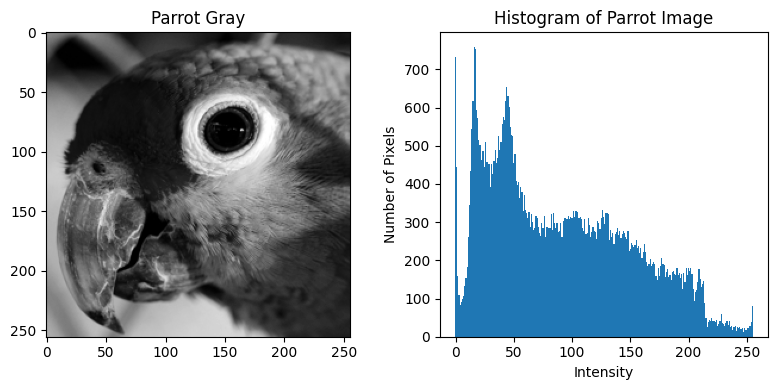

In [93]:
# TODO Repeat the code you used to solve Step 2 here (including the call to plt.tight_layout()).
#      Then add the following optional parameter to plt.subplots():   figsize=(8, 4)
#      Feel free to play around with the figsize parameter.  The first number is the figure width, 
#      the second is the figure height.
plt.subplots(1,2,figsize=(8, 4))

plt.subplot(1,2,1)
plt.imshow(parrotG,cmap='gray',vmin=0, vmax=1)
plt.title("Parrot Gray")

plt.subplot(1,2,2)
plt.bar(x, counts, width = 1)
plt.title("Histogram of Parrot Image")
plt.ylabel("Number of Pixels")
plt.xlabel("Intensity")

plt.tight_layout()

# Step 4: Display some transforms of the parrot image.

In a 1 by 3 grid of subplots, display the original color parrot image in the left subfigure, display the negated color image in the middle subfigure, and display the colour parrot image after a gamma transform with gamma = 0.4 in the right subfigure.  Use a figure size that provides an aspect ratio that results in an attractive figure.  Place a title on each subplot, identifying it.

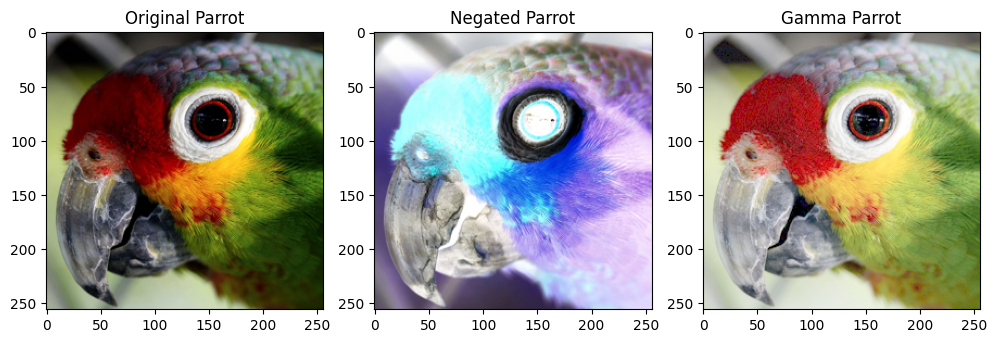

In [59]:
# TODO: Follow the step 4 instructions above.
plt.subplots(1,3,figsize=(10, 6))

plt.subplot(1,3,1)
plt.imshow(parrotU)
plt.title("Original Parrot")

plt.subplot(1,3,2)
parrotN = skutil.invert(parrotU)
plt.imshow(parrotN)
plt.title("Negated Parrot")

plt.subplot(1,3,3)
parrotGam = exposure.adjust_gamma(parrotU, gamma = 0.4)
plt.imshow(parrotGam)
plt.title("Gamma Parrot")

plt.tight_layout()

# Step 5: Display channel histograms of a colour image.

- Create a 2 by 3 grid of subplots.  The top row of 3 plots must display the grayscale images of the red, green, and blue channels of the original colour parrot image.   The bottom row must display the histograms of the corresponding histograms in the top row.  
- The figure layout should display the channels of the original image in order of R, G, and B from left to right.  Use numpy array slicing to obtain the image channels.  Recall that the channel is the 3rd index of the 3D numpy array that stores the parrot image.  Index 0 is the red channel, index 1 is the green channel, and index 2 is the blue channel.  
- Use a figure size that provides an aspect ratio that results in an attractive figure. Place a title on each subplot, identifying it.
- Set the range of the y-axis on the three histogram plots so that they are all the same. Use the range(0, 3000).

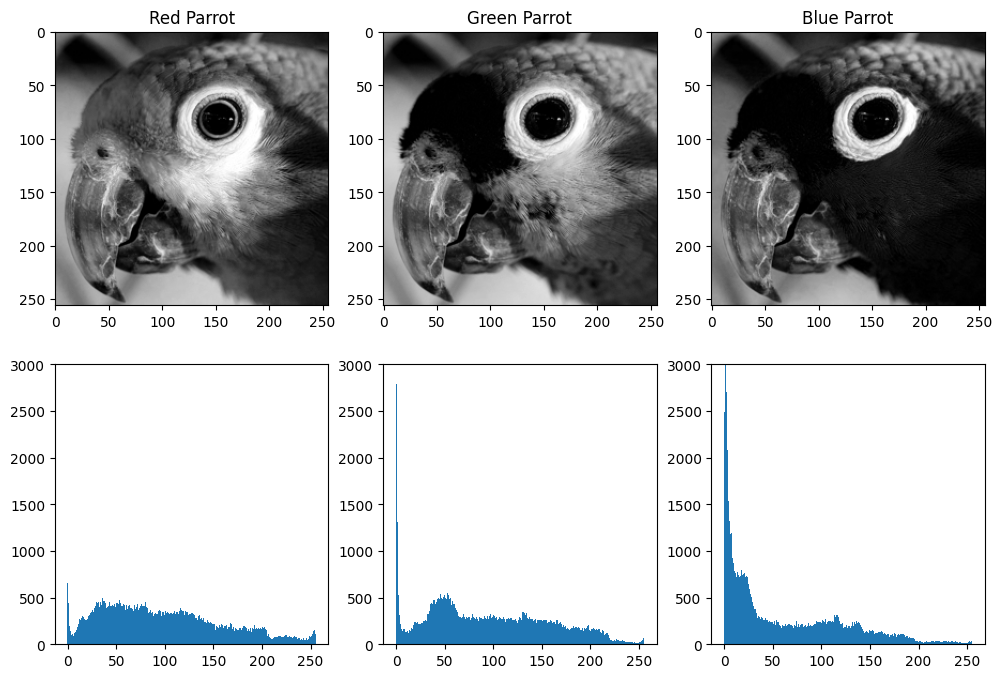

<Figure size 640x480 with 0 Axes>

In [95]:
# TODO: Follow the step 4 instructions above.
plt.subplots(2,3,figsize=(12, 8))

plt.subplot(2,3,1)
plt.imshow(parrotU[:, :, 0],cmap='gray')
plt.title("Red Parrot")

plt.subplot(2,3,2)
plt.imshow(parrotU[:, :, 1],cmap='gray')
plt.title("Green Parrot")

plt.subplot(2,3,3)
plt.imshow(parrotU[:, :, 2],cmap='gray')
plt.title("Blue Parrot")

plt.subplot(2,3,4)
red_count = np.histogram(parrotU[:, :, 0], bins=256)[0]
plt.ylim(0, 3000)
plt.bar(x, red_count, width = 1)

plt.subplot(2,3,5)
green_count = np.histogram(parrotU[:, :, 1], bins=256)[0]
plt.ylim(0, 3000)
plt.bar(x, green_count, width = 1)

plt.subplot(2,3,6)
blue_count = np.histogram(parrotU[:, :, 2], bins=256)[0]
plt.ylim(0, 3000)
plt.bar(x, blue_count, width = 1)


plt.show()
plt.tight_layout()